In [1]:
#import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import os
import pickle
import seaborn as sns
import datetime as dt
from model import StockEnv,get_scaler, play_one_episode, LinearModel, DQNAgent
from tqdm.notebook import tqdm
import pyfolio as pf
%matplotlib inline

C:\Users\User\anaconda3\envs\MyDjango\lib\site-packages\pyfolio\pos.py:26: UserWarning: Module "zipline.assets" not found; mutltipliers will not be applied to position notionals.
  warnings.warn(


Stock name: GS
Start: 2013-02-19 00:00:00, End: 2020-12-31 00:00:00
Training data: 1227 
Tsesting data: 756 


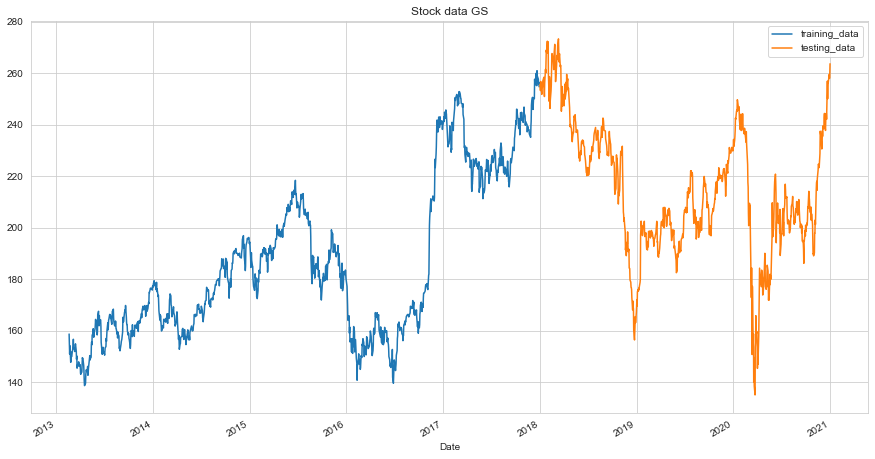

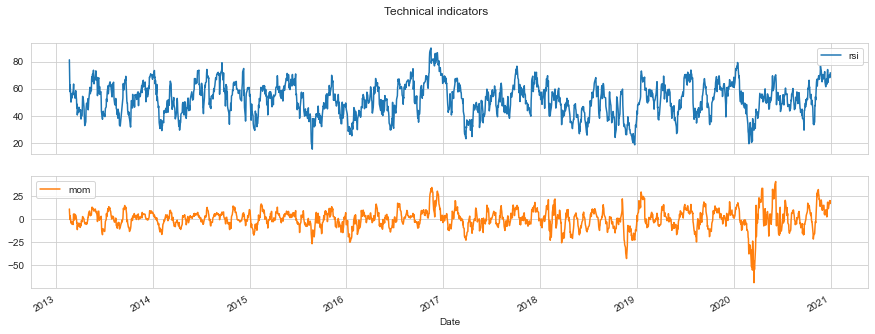

In [2]:
stock_name = 'gs'.upper()
industry = 'Financial Services'
stock_data = pd.read_csv(f'../train_test_data/{stock_name}.csv', index_col=['Date'], parse_dates=True)

train_data = stock_data.loc[:'2018-01-01']
test_data = stock_data.loc['2018-01-01':]

print(f'Stock name: {stock_name}')
print(f'Start: {stock_data.index[0]}, End: {stock_data.index[-1]}')
print(f'Training data: {len(train_data)} ')
print(f'Tsesting data: {len(test_data)} ')

sns.set_style('whitegrid')
train_data['Adj Close'].plot(label='training_data', figsize=(15,8));
test_data['Adj Close'].plot(label='testing_data');
plt.title('Stock data '+ stock_name)
plt.legend();
plt.show()

stock_data[['rsi', 'mom']].plot(subplots=True, figsize=(15,5), title='Technical indicators');
plt.show()




In [3]:
num_episodes = 2000
batch_size = 32
capital = 1000
data = stock_data['Adj Close'].values
n_timesteps = data.shape[0]


env = StockEnv(train_data, capital)
state_size = env.state_dim
action_size = 2
agent = DQNAgent(state_size, action_size)
scaler = get_scaler(env)

  0%|          | 0/2000 [00:00<?, ?it/s]

episode: 1/2000, episode end value: 1266.37, duration: 0:00:00.272061
episode: 2/2000, episode end value: 1309.30, duration: 0:00:00.253066
episode: 3/2000, episode end value: 1313.63, duration: 0:00:00.269055
episode: 4/2000, episode end value: 1289.07, duration: 0:00:00.255055
episode: 5/2000, episode end value: 1319.91, duration: 0:00:00.251058
episode: 6/2000, episode end value: 1273.51, duration: 0:00:00.282062
episode: 7/2000, episode end value: 1296.26, duration: 0:00:00.280063
episode: 8/2000, episode end value: 1308.85, duration: 0:00:00.290067
episode: 9/2000, episode end value: 1309.23, duration: 0:00:00.271060
episode: 10/2000, episode end value: 1310.77, duration: 0:00:00.269061
episode: 11/2000, episode end value: 1315.96, duration: 0:00:00.309068
episode: 12/2000, episode end value: 1306.01, duration: 0:00:00.283061
episode: 13/2000, episode end value: 1314.39, duration: 0:00:00.273062
episode: 14/2000, episode end value: 1381.18, duration: 0:00:00.261059
episode: 15/200

episode: 117/2000, episode end value: 1299.59, duration: 0:00:00.311095
episode: 118/2000, episode end value: 1298.07, duration: 0:00:00.282075
episode: 119/2000, episode end value: 1297.24, duration: 0:00:00.275063
episode: 120/2000, episode end value: 1298.71, duration: 0:00:00.271062
episode: 121/2000, episode end value: 1299.46, duration: 0:00:00.276656
episode: 122/2000, episode end value: 1298.52, duration: 0:00:00.272094
episode: 123/2000, episode end value: 1287.26, duration: 0:00:00.266058
episode: 124/2000, episode end value: 1288.00, duration: 0:00:00.267062
episode: 125/2000, episode end value: 1287.40, duration: 0:00:00.270062
episode: 126/2000, episode end value: 1300.46, duration: 0:00:00.277065
episode: 127/2000, episode end value: 1329.64, duration: 0:00:00.293069
episode: 128/2000, episode end value: 1295.63, duration: 0:00:00.279626
episode: 129/2000, episode end value: 1299.20, duration: 0:00:00.287058
episode: 130/2000, episode end value: 1298.50, duration: 0:00:00

episode: 231/2000, episode end value: 1278.73, duration: 0:00:00.321071
episode: 232/2000, episode end value: 1285.51, duration: 0:00:00.322682
episode: 233/2000, episode end value: 1286.90, duration: 0:00:00.366549
episode: 234/2000, episode end value: 1283.49, duration: 0:00:00.435097
episode: 235/2000, episode end value: 1288.18, duration: 0:00:00.364085
episode: 236/2000, episode end value: 1285.63, duration: 0:00:00.371084
episode: 237/2000, episode end value: 1285.62, duration: 0:00:00.381087
episode: 238/2000, episode end value: 1286.37, duration: 0:00:00.429097
episode: 239/2000, episode end value: 1285.50, duration: 0:00:00.468107
episode: 240/2000, episode end value: 1277.61, duration: 0:00:00.417099
episode: 241/2000, episode end value: 1277.12, duration: 0:00:00.403094
episode: 242/2000, episode end value: 1286.03, duration: 0:00:00.344071
episode: 243/2000, episode end value: 1296.23, duration: 0:00:00.345080
episode: 244/2000, episode end value: 1284.29, duration: 0:00:00

episode: 345/2000, episode end value: 1286.54, duration: 0:00:00.364086
episode: 346/2000, episode end value: 1287.04, duration: 0:00:00.414090
episode: 347/2000, episode end value: 1297.99, duration: 0:00:00.372084
episode: 348/2000, episode end value: 1298.11, duration: 0:00:00.409089
episode: 349/2000, episode end value: 1289.16, duration: 0:00:00.496116
episode: 350/2000, episode end value: 1278.23, duration: 0:00:00.453108
episode: 351/2000, episode end value: 1287.36, duration: 0:00:00.403088
episode: 352/2000, episode end value: 1316.45, duration: 0:00:00.401095
episode: 353/2000, episode end value: 1296.81, duration: 0:00:00.463107
episode: 354/2000, episode end value: 1288.37, duration: 0:00:00.424093
episode: 355/2000, episode end value: 1278.16, duration: 0:00:00.485110
episode: 356/2000, episode end value: 1289.44, duration: 0:00:00.465108
episode: 357/2000, episode end value: 1305.92, duration: 0:00:00.453350
episode: 358/2000, episode end value: 1303.17, duration: 0:00:00

episode: 459/2000, episode end value: 1340.32, duration: 0:00:00.436098
episode: 460/2000, episode end value: 1408.05, duration: 0:00:00.416094
episode: 461/2000, episode end value: 1384.08, duration: 0:00:00.405235
episode: 462/2000, episode end value: 1418.89, duration: 0:00:00.489652
episode: 463/2000, episode end value: 1252.24, duration: 0:00:00.480109
episode: 464/2000, episode end value: 1259.80, duration: 0:00:00.444829
episode: 465/2000, episode end value: 1279.16, duration: 0:00:00.391864
episode: 466/2000, episode end value: 1269.30, duration: 0:00:00.415093
episode: 467/2000, episode end value: 1269.63, duration: 0:00:00.579458
episode: 468/2000, episode end value: 1273.93, duration: 0:00:00.551595
episode: 469/2000, episode end value: 1270.97, duration: 0:00:00.506112
episode: 470/2000, episode end value: 1268.78, duration: 0:00:00.537122
episode: 471/2000, episode end value: 1273.77, duration: 0:00:00.594138
episode: 472/2000, episode end value: 1256.14, duration: 0:00:00

episode: 573/2000, episode end value: 1262.14, duration: 0:00:00.564130
episode: 574/2000, episode end value: 1259.54, duration: 0:00:00.449104
episode: 575/2000, episode end value: 1269.44, duration: 0:00:00.451102
episode: 576/2000, episode end value: 1261.43, duration: 0:00:00.509117
episode: 577/2000, episode end value: 1264.22, duration: 0:00:00.448101
episode: 578/2000, episode end value: 1264.90, duration: 0:00:00.446099
episode: 579/2000, episode end value: 1261.44, duration: 0:00:00.494112
episode: 580/2000, episode end value: 1263.68, duration: 0:00:00.465106
episode: 581/2000, episode end value: 1264.92, duration: 0:00:00.486109
episode: 582/2000, episode end value: 1262.95, duration: 0:00:00.447098
episode: 583/2000, episode end value: 1257.09, duration: 0:00:00.452103
episode: 584/2000, episode end value: 1261.98, duration: 0:00:00.507120
episode: 585/2000, episode end value: 1266.18, duration: 0:00:00.416089
episode: 586/2000, episode end value: 1262.52, duration: 0:00:00

episode: 687/2000, episode end value: 1289.18, duration: 0:00:00.417093
episode: 688/2000, episode end value: 1285.02, duration: 0:00:00.424088
episode: 689/2000, episode end value: 1289.33, duration: 0:00:00.412092
episode: 690/2000, episode end value: 1341.55, duration: 0:00:00.407091
episode: 691/2000, episode end value: 1309.03, duration: 0:00:00.406094
episode: 692/2000, episode end value: 1416.88, duration: 0:00:00.458107
episode: 693/2000, episode end value: 1378.51, duration: 0:00:00.420004
episode: 694/2000, episode end value: 1343.89, duration: 0:00:00.484110
episode: 695/2000, episode end value: 1310.23, duration: 0:00:00.569129
episode: 696/2000, episode end value: 1328.51, duration: 0:00:00.522120
episode: 697/2000, episode end value: 1285.55, duration: 0:00:00.485109
episode: 698/2000, episode end value: 1356.23, duration: 0:00:00.493110
episode: 699/2000, episode end value: 1282.06, duration: 0:00:00.558129
episode: 700/2000, episode end value: 1430.63, duration: 0:00:00

episode: 801/2000, episode end value: 1361.56, duration: 0:00:00.484106
episode: 802/2000, episode end value: 1275.64, duration: 0:00:00.571125
episode: 803/2000, episode end value: 1375.47, duration: 0:00:00.525124
episode: 804/2000, episode end value: 1343.60, duration: 0:00:00.528118
episode: 805/2000, episode end value: 1386.39, duration: 0:00:00.475107
episode: 806/2000, episode end value: 1260.85, duration: 0:00:00.459108
episode: 807/2000, episode end value: 1305.10, duration: 0:00:00.492117
episode: 808/2000, episode end value: 1276.91, duration: 0:00:00.546122
episode: 809/2000, episode end value: 1259.67, duration: 0:00:00.561127
episode: 810/2000, episode end value: 1262.72, duration: 0:00:00.517119
episode: 811/2000, episode end value: 1416.52, duration: 0:00:00.471106
episode: 812/2000, episode end value: 1315.61, duration: 0:00:00.410096
episode: 813/2000, episode end value: 1336.11, duration: 0:00:00.498117
episode: 814/2000, episode end value: 1326.36, duration: 0:00:00

episode: 915/2000, episode end value: 1269.42, duration: 0:00:00.442711
episode: 916/2000, episode end value: 1275.13, duration: 0:00:00.466993
episode: 917/2000, episode end value: 1330.79, duration: 0:00:00.472820
episode: 918/2000, episode end value: 1277.58, duration: 0:00:00.510187
episode: 919/2000, episode end value: 1293.02, duration: 0:00:00.503892
episode: 920/2000, episode end value: 1344.18, duration: 0:00:00.451099
episode: 921/2000, episode end value: 1221.68, duration: 0:00:00.369002
episode: 922/2000, episode end value: 1252.74, duration: 0:00:00.460998
episode: 923/2000, episode end value: 1329.70, duration: 0:00:00.410365
episode: 924/2000, episode end value: 1246.22, duration: 0:00:00.442105
episode: 925/2000, episode end value: 1258.67, duration: 0:00:00.480112
episode: 926/2000, episode end value: 1257.60, duration: 0:00:00.502109
episode: 927/2000, episode end value: 1270.56, duration: 0:00:00.461105
episode: 928/2000, episode end value: 1255.56, duration: 0:00:00

episode: 1029/2000, episode end value: 1296.12, duration: 0:00:00.494105
episode: 1030/2000, episode end value: 1384.77, duration: 0:00:00.516112
episode: 1031/2000, episode end value: 1291.58, duration: 0:00:00.510116
episode: 1032/2000, episode end value: 1299.06, duration: 0:00:00.480114
episode: 1033/2000, episode end value: 1314.48, duration: 0:00:00.508111
episode: 1034/2000, episode end value: 1299.54, duration: 0:00:00.539126
episode: 1035/2000, episode end value: 1281.83, duration: 0:00:00.561129
episode: 1036/2000, episode end value: 1297.65, duration: 0:00:00.540120
episode: 1037/2000, episode end value: 1299.76, duration: 0:00:00.521120
episode: 1038/2000, episode end value: 1299.24, duration: 0:00:00.505116
episode: 1039/2000, episode end value: 1298.72, duration: 0:00:00.573129
episode: 1040/2000, episode end value: 1299.44, duration: 0:00:00.470105
episode: 1041/2000, episode end value: 1302.95, duration: 0:00:00.520100
episode: 1042/2000, episode end value: 1311.04, dur

episode: 1142/2000, episode end value: 1348.72, duration: 0:00:00.456102
episode: 1143/2000, episode end value: 1356.45, duration: 0:00:00.509119
episode: 1144/2000, episode end value: 1338.20, duration: 0:00:00.456106
episode: 1145/2000, episode end value: 1342.18, duration: 0:00:00.446100
episode: 1146/2000, episode end value: 1433.63, duration: 0:00:00.480106
episode: 1147/2000, episode end value: 1324.87, duration: 0:00:00.485111
episode: 1148/2000, episode end value: 1368.50, duration: 0:00:00.465105
episode: 1149/2000, episode end value: 1359.11, duration: 0:00:00.521123
episode: 1150/2000, episode end value: 1298.58, duration: 0:00:00.549130
episode: 1151/2000, episode end value: 1258.04, duration: 0:00:00.383081
episode: 1152/2000, episode end value: 1373.87, duration: 0:00:00.460100
episode: 1153/2000, episode end value: 1267.94, duration: 0:00:00.472111
episode: 1154/2000, episode end value: 1386.71, duration: 0:00:00.427668
episode: 1155/2000, episode end value: 1410.85, dur

episode: 1255/2000, episode end value: 1297.14, duration: 0:00:00.333076
episode: 1256/2000, episode end value: 1292.67, duration: 0:00:00.489110
episode: 1257/2000, episode end value: 1316.37, duration: 0:00:00.442100
episode: 1258/2000, episode end value: 1303.48, duration: 0:00:00.454106
episode: 1259/2000, episode end value: 1329.46, duration: 0:00:00.543122
episode: 1260/2000, episode end value: 1307.56, duration: 0:00:00.529118
episode: 1261/2000, episode end value: 1352.75, duration: 0:00:00.542621
episode: 1262/2000, episode end value: 1355.44, duration: 0:00:00.491110
episode: 1263/2000, episode end value: 1278.02, duration: 0:00:00.513116
episode: 1264/2000, episode end value: 1370.34, duration: 0:00:00.504116
episode: 1265/2000, episode end value: 1329.21, duration: 0:00:00.511708
episode: 1266/2000, episode end value: 1381.26, duration: 0:00:00.477873
episode: 1267/2000, episode end value: 1273.61, duration: 0:00:00.476110
episode: 1268/2000, episode end value: 1276.94, dur

episode: 1368/2000, episode end value: 1358.46, duration: 0:00:00.512118
episode: 1369/2000, episode end value: 1288.55, duration: 0:00:00.496136
episode: 1370/2000, episode end value: 1349.69, duration: 0:00:00.469652
episode: 1371/2000, episode end value: 1348.24, duration: 0:00:00.475416
episode: 1372/2000, episode end value: 1407.56, duration: 0:00:00.451686
episode: 1373/2000, episode end value: 1275.23, duration: 0:00:00.465975
episode: 1374/2000, episode end value: 1271.88, duration: 0:00:00.478104
episode: 1375/2000, episode end value: 1347.26, duration: 0:00:00.400091
episode: 1376/2000, episode end value: 1355.02, duration: 0:00:00.499114
episode: 1377/2000, episode end value: 1355.37, duration: 0:00:00.560126
episode: 1378/2000, episode end value: 1348.85, duration: 0:00:00.440098
episode: 1379/2000, episode end value: 1331.76, duration: 0:00:00.457103
episode: 1380/2000, episode end value: 1354.10, duration: 0:00:00.495110
episode: 1381/2000, episode end value: 1279.11, dur

episode: 1481/2000, episode end value: 1262.16, duration: 0:00:00.442100
episode: 1482/2000, episode end value: 1255.91, duration: 0:00:00.469264
episode: 1483/2000, episode end value: 1255.36, duration: 0:00:00.492477
episode: 1484/2000, episode end value: 1255.50, duration: 0:00:00.454101
episode: 1485/2000, episode end value: 1264.64, duration: 0:00:00.442101
episode: 1486/2000, episode end value: 1258.94, duration: 0:00:00.484114
episode: 1487/2000, episode end value: 1269.19, duration: 0:00:00.492110
episode: 1488/2000, episode end value: 1258.58, duration: 0:00:00.483109
episode: 1489/2000, episode end value: 1344.76, duration: 0:00:00.441098
episode: 1490/2000, episode end value: 1350.67, duration: 0:00:00.412099
episode: 1491/2000, episode end value: 1263.54, duration: 0:00:00.499113
episode: 1492/2000, episode end value: 1252.58, duration: 0:00:00.489687
episode: 1493/2000, episode end value: 1261.64, duration: 0:00:00.509429
episode: 1494/2000, episode end value: 1268.36, dur

episode: 1594/2000, episode end value: 1262.37, duration: 0:00:00.491115
episode: 1595/2000, episode end value: 1267.14, duration: 0:00:00.517119
episode: 1596/2000, episode end value: 1258.84, duration: 0:00:00.490114
episode: 1597/2000, episode end value: 1258.00, duration: 0:00:00.406316
episode: 1598/2000, episode end value: 1255.71, duration: 0:00:00.536120
episode: 1599/2000, episode end value: 1257.56, duration: 0:00:00.510116
episode: 1600/2000, episode end value: 1252.58, duration: 0:00:00.520119
episode: 1601/2000, episode end value: 1364.55, duration: 0:00:00.486114
episode: 1602/2000, episode end value: 1258.61, duration: 0:00:00.433091
episode: 1603/2000, episode end value: 1260.60, duration: 0:00:00.514115
episode: 1604/2000, episode end value: 1265.69, duration: 0:00:00.558129
episode: 1605/2000, episode end value: 1259.66, duration: 0:00:00.506113
episode: 1606/2000, episode end value: 1259.90, duration: 0:00:00.501115
episode: 1607/2000, episode end value: 1257.10, dur

episode: 1707/2000, episode end value: 1387.37, duration: 0:00:00.393092
episode: 1708/2000, episode end value: 1360.95, duration: 0:00:00.422094
episode: 1709/2000, episode end value: 1385.60, duration: 0:00:00.432097
episode: 1710/2000, episode end value: 1365.37, duration: 0:00:00.377085
episode: 1711/2000, episode end value: 1400.31, duration: 0:00:00.426092
episode: 1712/2000, episode end value: 1391.59, duration: 0:00:00.447102
episode: 1713/2000, episode end value: 1299.72, duration: 0:00:00.419087
episode: 1714/2000, episode end value: 1326.12, duration: 0:00:00.510112
episode: 1715/2000, episode end value: 1419.37, duration: 0:00:00.412096
episode: 1716/2000, episode end value: 1339.88, duration: 0:00:00.470082
episode: 1717/2000, episode end value: 1335.62, duration: 0:00:00.446660
episode: 1718/2000, episode end value: 1316.78, duration: 0:00:00.488112
episode: 1719/2000, episode end value: 1252.12, duration: 0:00:00.475105
episode: 1720/2000, episode end value: 1255.49, dur

episode: 1820/2000, episode end value: 1339.30, duration: 0:00:00.427100
episode: 1821/2000, episode end value: 1354.61, duration: 0:00:00.383088
episode: 1822/2000, episode end value: 1328.33, duration: 0:00:00.456099
episode: 1823/2000, episode end value: 1281.94, duration: 0:00:00.459104
episode: 1824/2000, episode end value: 1274.04, duration: 0:00:00.337079
episode: 1825/2000, episode end value: 1256.26, duration: 0:00:00.436096
episode: 1826/2000, episode end value: 1262.24, duration: 0:00:00.501114
episode: 1827/2000, episode end value: 1269.77, duration: 0:00:00.389087
episode: 1828/2000, episode end value: 1262.47, duration: 0:00:00.531122
episode: 1829/2000, episode end value: 1264.84, duration: 0:00:00.541122
episode: 1830/2000, episode end value: 1269.52, duration: 0:00:00.441097
episode: 1831/2000, episode end value: 1267.79, duration: 0:00:00.461104
episode: 1832/2000, episode end value: 1264.63, duration: 0:00:00.385090
episode: 1833/2000, episode end value: 1266.02, dur

episode: 1933/2000, episode end value: 1254.82, duration: 0:00:00.333073
episode: 1934/2000, episode end value: 1255.63, duration: 0:00:00.373086
episode: 1935/2000, episode end value: 1257.87, duration: 0:00:00.330080
episode: 1936/2000, episode end value: 1260.42, duration: 0:00:00.352074
episode: 1937/2000, episode end value: 1257.14, duration: 0:00:00.322075
episode: 1938/2000, episode end value: 1264.07, duration: 0:00:00.339078
episode: 1939/2000, episode end value: 1250.90, duration: 0:00:00.353076
episode: 1940/2000, episode end value: 1249.92, duration: 0:00:00.332070
episode: 1941/2000, episode end value: 1259.96, duration: 0:00:00.356082
episode: 1942/2000, episode end value: 1263.23, duration: 0:00:00.334079
episode: 1943/2000, episode end value: 1256.30, duration: 0:00:00.314071
episode: 1944/2000, episode end value: 1254.14, duration: 0:00:00.319074
episode: 1945/2000, episode end value: 1251.09, duration: 0:00:00.332081
episode: 1946/2000, episode end value: 1257.14, dur

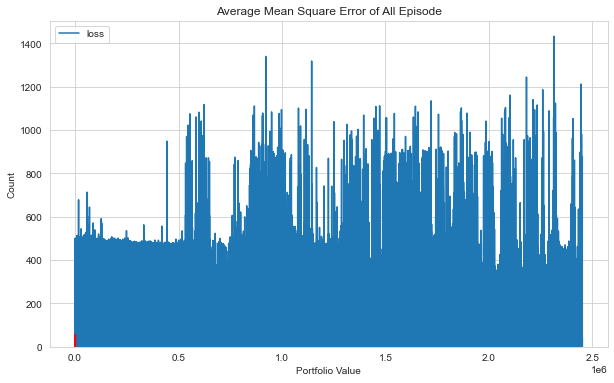

In [4]:
#train


mode = 'train'

portfolio_value = []



for e in tqdm(range(num_episodes)):
    t0 = datetime.now()
    val = play_one_episode(agent, env, mode, scaler)
    dt = datetime.now() - t0
    print(f"episode: {e + 1}/{num_episodes}, episode end value: {val['portfolio_value'][-1]:.2f}, duration: {dt}")
    portfolio_value.append(val['portfolio_value'][-1]) 


if mode == 'train':
    # save the DQN
    agent.save(f'state_dict/{stock_name}.npz')

    # save the scaler
    with open(f'scaler/{stock_name}.pkl', 'wb') as f:
        pickle.dump(scaler, f)

    # plot losses
    loss = agent.model.losses
    losses = pd.DataFrame(loss, columns=['loss'])
    losses.plot(figsize=(10,6))
    plt.title('Average Mean Square Error of All Episode')
    plt.xlabel('Step')
    plt.ylabel('Mean Square Error')

print(f'average reward: {np.mean(portfolio_value):.2f}, min: {np.min(portfolio_value):.2f}, max: {np.max(portfolio_value):.2f}')
sns.histplot(portfolio_value, bins=100, color='r', kde=True);
plt.xlabel('Portfolio Value');
plt.ylabel('Count');

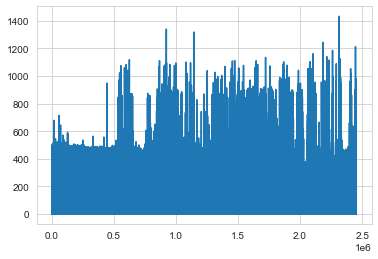

In [5]:
plt.plot(agent.model.losses)

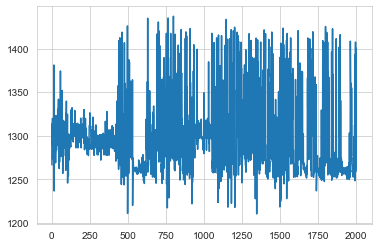

In [6]:
plt.plot(portfolio_value)

episode end value: 1197.99, duration: 0:00:00.130031
Sell: 368 times, Buy: 360 times


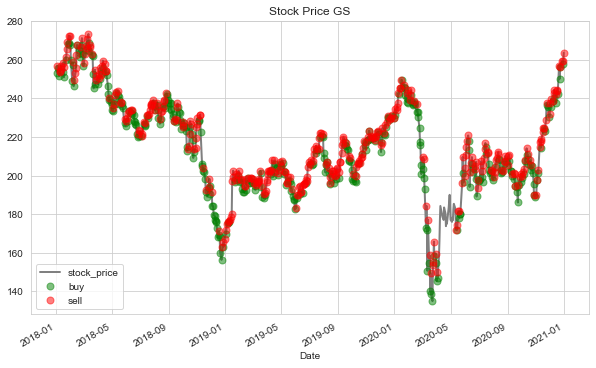

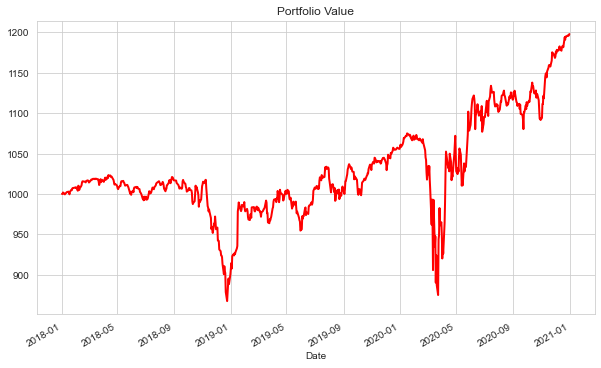

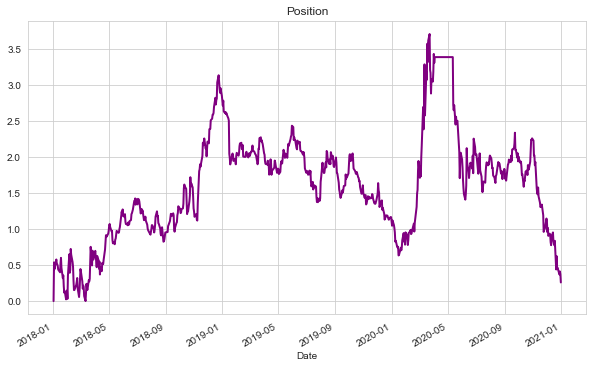

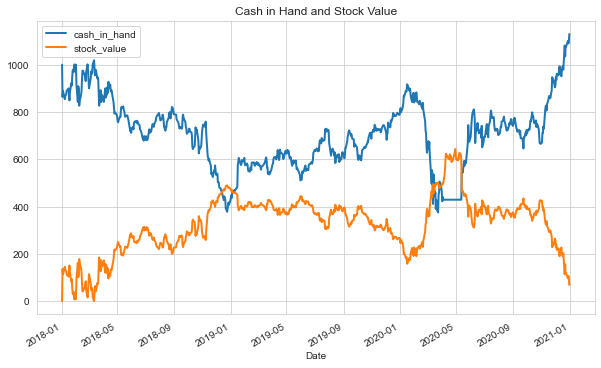

In [7]:
#test

mode = 'test'

portfolio_value = []


with open(f'scaler/{stock_name}.pkl', 'rb') as f:
    scaler = pickle.load(f)
    
env = StockEnv(test_data, capital)
agent.epsilon = 0
agent.load(f'state_dict/{stock_name}.npz')



t0 = datetime.now()
val = play_one_episode(agent, env, mode, scaler)
dt = datetime.now() - t0
print(f"episode end value: {val['portfolio_value'][-1]:.2f}, duration: {dt}")
portfolio_value.append(val['portfolio_value'][-1])
    
print(f"Sell: {env.sell_buy.count('sell')} times, Buy: {env.sell_buy.count('buy')} times")



result = pd.DataFrame(val)
result.index = test_data.index

def marker_buy(col):
    price = col[0] 
    sellbuy = col[1]
    
    if sellbuy == 'buy':
        return price
    else:
        return np.nan
    
def marker_sell(col):
    price = col[0] 
    sellbuy = col[1]
    
    if sellbuy == 'sell':
        return price
    else:
        return np.nan
    
result['marker_buy'] = result[['stock_price', 'sell_buy']].apply(marker_buy, axis=1);
result['marker_sell'] = result[['stock_price', 'sell_buy']].apply(marker_sell, axis=1);

result['stock_price'].plot(figsize=(10,6), c='grey', lw=2);
result['marker_buy'].plot(style='o', ms=7, label='buy', c='g', alpha=0.5);
result['marker_sell'].plot(style='o', ms=7, label='sell', c='r', alpha=0.5);
plt.title('Stock Price '+ stock_name)
plt.legend();
plt.show()



result['portfolio_value'].plot(figsize=(10,6), c='r', lw=2);
plt.title('Portfolio Value');
plt.show()

result['stock_owned'].plot(figsize=(10,6), c='purple', lw=2);
plt.title('Position')
plt.show()

result[['cash_in_hand', 'stock_value']].plot(figsize=(10,6), lw=2);
plt.title('Cash in Hand and Stock Value');
plt.show()

In [8]:


def CAGR(DF):
    df = DF.copy()
    try:
        df['daily_ret'] = df['portfolio_value'].pct_change()
    except:
        df['daily_ret'] = df['Adj Close'].pct_change() 
    
    df['cumulative_ret'] = (1 + df['daily_ret']).cumprod()
    n = len(df)/252
    cagr = (df['cumulative_ret'][-1])**(1/n) - 1
    return cagr

def volatility(DF):
    df = DF.copy()
    try:
        df['daily_ret'] = df['portfolio_value'].pct_change()
    except:
        df['daily_ret'] = df['Adj Close'].pct_change() 
    vol = df['daily_ret'].std() * np.sqrt(252)
    return vol


def sharpe(DF, rf):
    df = DF.copy()
    sr = (CAGR(df) - rf)/volatility(df)
    return sr

def max_dd(DF):
    df = DF.copy()
    try:
        df['daily_ret'] = df['portfolio_value'].pct_change()
    except:
        df['daily_ret'] = df['Adj Close'].pct_change() 
    df['cumulative_ret'] = (1 + df['daily_ret']).cumprod()
    df['cum_roll_max'] = df['cumulative_ret'].cummax()
    df['drawdown'] = df['cum_roll_max'] - df['cumulative_ret']
    df['drawdown_pct'] = df['drawdown']/df['cum_roll_max']
    max_dd = df['drawdown_pct'].max()
    return max_dd

def calmer(DF):
    df = DF.copy()
    clmr = CAGR(df)/max_dd(df)
    return clmr



print(f'Stock name: {stock_name}')
print(f'Start: {result.index[0]}  End: {result.index[-1]}')
print(f'Compound Annual Growth Rate: {CAGR(result)*100:.2f} %')
print(f'Volatility: {volatility(result):.4f}')
print(f'shape ratio: {sharpe(result, 0.011):.4f}')
print(f'Maximun drawdown: {max_dd(result)*-100:.2f} %')
print(f'Calmar ratio: {calmer(result):.4f}')
print('-----------------------------------------------------------')
print('-----------------------------------------------------------')
print('Comparing with Adj close')
print(f'Compound Annual Growth Rate (Adj close): {CAGR(test_data)*100:.2f} %')
print(f'Volatility (benchmark): {volatility(test_data):.4f}')
print(f'shape ratio: {sharpe(test_data, 0.011):.4f}')
print(f'Maximun drawdown: {max_dd(test_data)*-100:.2f} %')
print(f'Calmar ratio (benchmark): {calmer(test_data):.4f}')

Stock name: GS
Start: 2018-01-02 00:00:00  End: 2020-12-31 00:00:00
Compound Annual Growth Rate: 6.21 %
Volatility: 0.1560
shape ratio: 0.3274
Maximun drawdown: -18.61 %
Calmar ratio: 0.3335
-----------------------------------------------------------
-----------------------------------------------------------
Comparing with Adj close
Compound Annual Growth Rate (Adj close): 1.04 %
Volatility (benchmark): 0.3636
shape ratio: -0.0017
Maximun drawdown: -50.63 %
Calmar ratio (benchmark): 0.0205


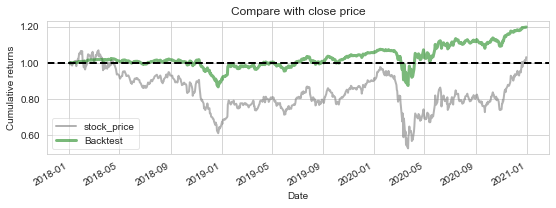

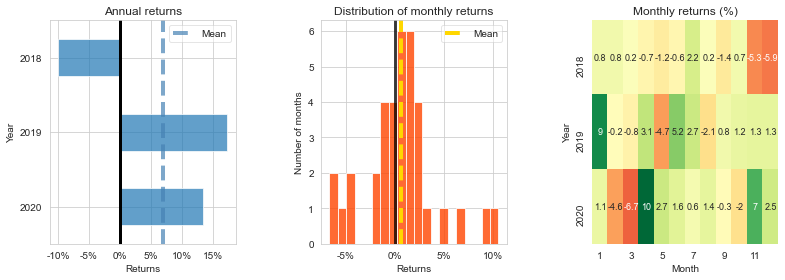

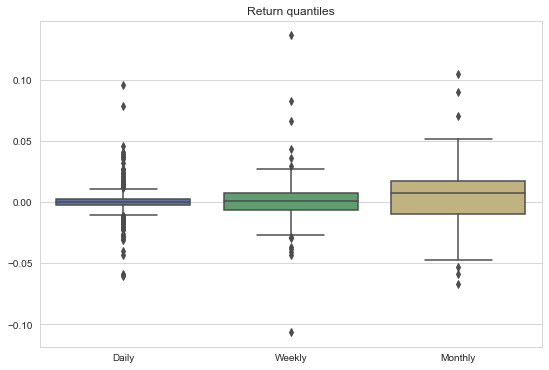

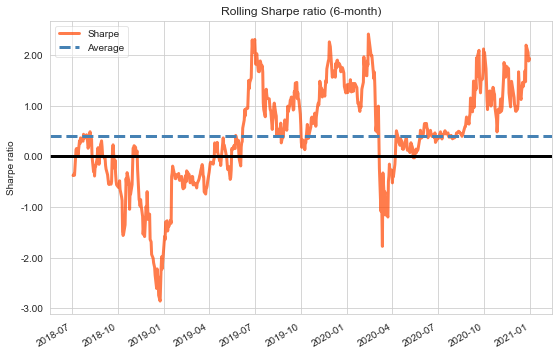

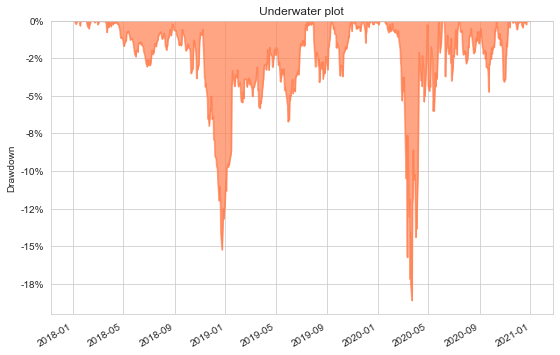

In [9]:


bt_returns = result['portfolio_value'].pct_change()
price = result['stock_price'].pct_change()



plt.figure(figsize=(9,6));
plt.subplot(2,1,1);
pf.plotting.plot_rolling_returns(bt_returns, price);
plt.title('Compare with close price');
plt.show()

fig = plt.figure(1)
plt.subplot(1,3,1)
pf.plot_annual_returns(bt_returns)
plt.subplot(1,3,2)
pf.plot_monthly_returns_dist(bt_returns)
plt.subplot(1,3,3)
pf.plot_monthly_returns_heatmap(bt_returns)
plt.tight_layout()
fig.set_size_inches(12,4)

plt.figure(figsize=(9,6))
pf.plot_return_quantiles(bt_returns);



plt.figure(figsize=(9,6))
pf.plot_rolling_sharpe(bt_returns);

plt.figure(figsize=(9,6))
pf.plot_drawdown_underwater(bt_returns);

score = (sharpe(result, 0.011) - sharpe(test_data, 0.011))*10
ret = ((result['portfolio_value'][-1] - result['portfolio_value'][0])/result['portfolio_value'][0]) * 100
with open(f'score/{stock_name}.pkl', 'wb') as f:  # Python 3: open(..., 'wb')
    pickle.dump([stock_name, industry,score, ret], f)
    
    
result.to_csv(f'../data/{stock_name}.csv')